### Q1. Many users log in and view the chat without commenting. Which users spent the most time in the logs? (3pts) Which users logged in the most (2pts)

In [1]:
import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

f = open('hackers.log',encoding='latin1')
data = f.read() # reading the log data
f.close()
print(data[:6000]) # checking first 1000 chars from the data 

--- Log opened Tue Sep 20 00:01:49 2016
00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit: Bye]
00:11 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:14 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has joined #hackers
00:15 -!- _CyBruh_ [-Cybruh@AN-gm6.oj9.rj1tv4.IP] has quit [Quit: Leaving]
00:20 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?
00:27 < ice231> we need help with an op but were stuck at this one part
00:27 -!- Bobseviltwin [steven@stupid.hunkey.monkey] has quit [Ping timeout: 121 seconds]
00:30 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has quit [Quit: Leaving]
00:30 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:35 -!- Anonymous5 [Anonymous5@AN-tu4.e85.r2ddjo.IP] has joined #hackers


In [2]:
import re 
pattern = re.compile(r"^[0-9]{1,2}:[0-9]{1,2} -!- .* \[.+@.+\] ")
users = []
for line in data.split('\n') : 
    d = re.findall(pattern,line)
    if d : 
        try : 
            name,username = d[0][10:].split()
            username = re.sub(r'\[|\]','',username)
            users.append([name,username])
        except : 
            pass # ignore exceptions

In [3]:
df = pd.DataFrame(users,columns=['Name','Username'])

In [4]:
df.shape # so we have 228000 entries for users 

(228000, 2)

In [5]:
df.head()

,Name,Username
0,Guest40341,AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP
1,peejr,peeejr@AN-sru.3ib.ec0efc.IP
2,Gilgamesh,Gilgamesh@AN-nkf.mv0.se355c.IP
3,_CyBruh_,-Cybruh@AN-gm6.oj9.rj1tv4.IP
4,peejr,peeejr@AN-sru.3ib.ec0efc.IP


#### Ploting to 20 Most Common User in Chat 

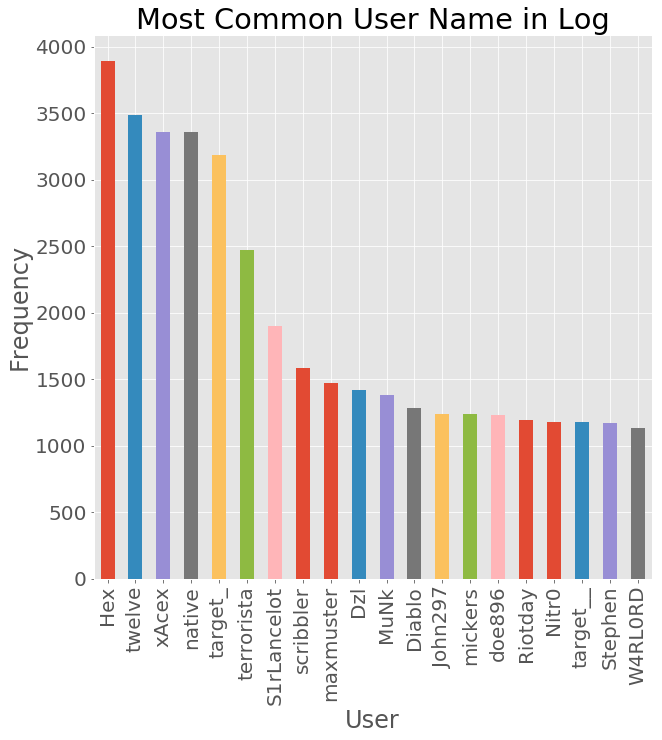

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Most Common User Name in Log')
ax.set_xlabel("User")
ax.set_ylabel("Frequency")
df['Name'].value_counts()[:20].plot(kind='bar',ax=ax)


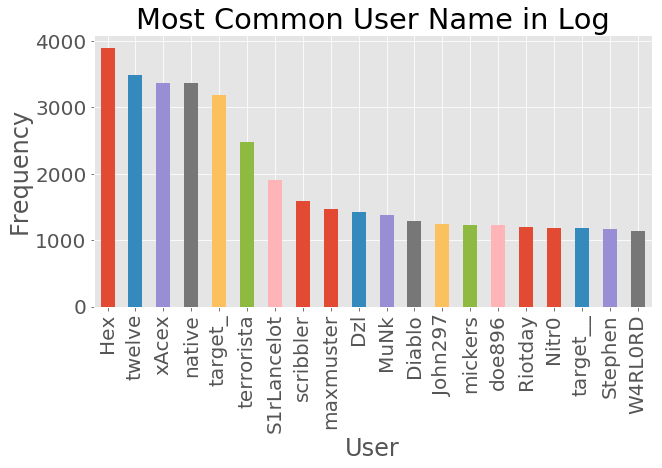

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Most Common User Name in Log')
ax.set_xlabel("User")
ax.set_ylabel("Frequency")
df['Name'].value_counts()[:20].plot(kind='bar',ax=ax)


#### So we can see most common user is 

    Hex, than twelve, xAcex, native

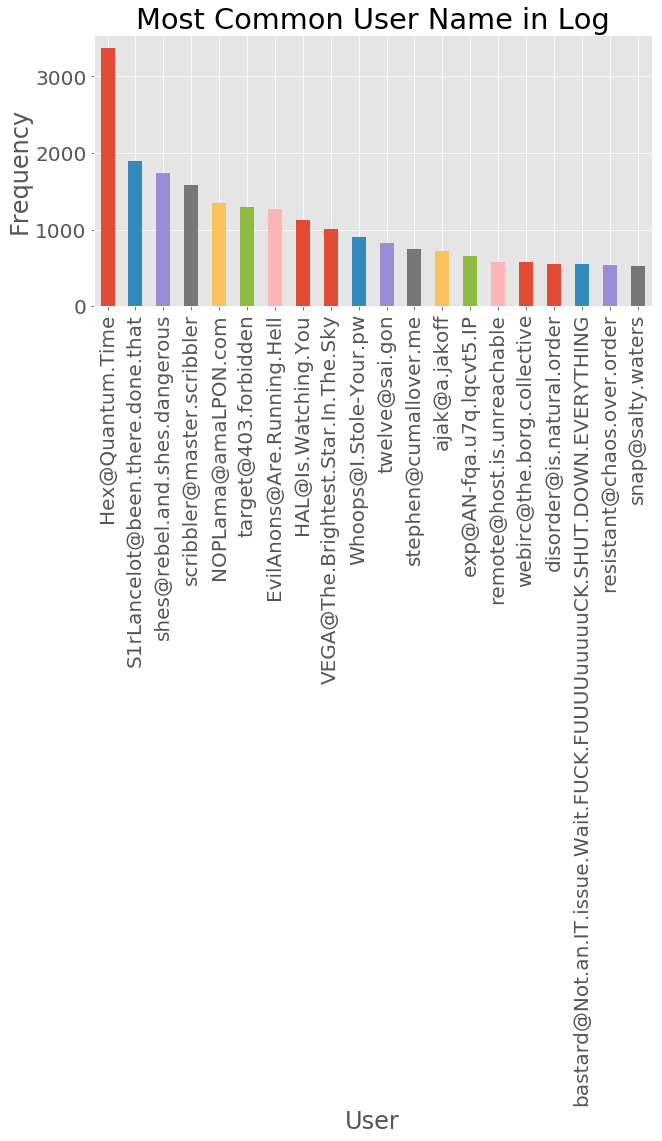

In [8]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Most Common User Name in Log')
ax.set_xlabel("User")
ax.set_ylabel("Frequency")
df['Username'].value_counts()[:20].plot(kind='bar',ax=ax)
plt.show()

###  Q2. Find the most common words (3 pts)

#### Let's Find Most Common World

In [9]:
f = open('hackers.log',encoding='latin1') # reading log file
data = f.read()
raw_data = data.split() # spliting data from space so that we have word list

In [10]:
import pandas as pd # importing necessary libraries for processing 
import numpy as np 

s = pd.Series(raw_data) # createing a Series Object from string to process it quickly and efficiently
# as well as Pandas series provides us many functionaities as we can group, count or plot data


In [11]:
s.value_counts()[:20] # value count willl count each word's repetation than we are slicing to 20 most comman words oly 

-!-            246910
has            230814
<              170074
#hackers       119392
joined         114639
quit           109590
to              41055
a               40354
[Quit:          38620
timeout:        37437
121             37410
seconds]        37227
[Ping           37195
and             35808
the             35491
is              34683
closed]         32785
<+evilbot>      30725
-               29510
[Connection     29238
dtype: int64

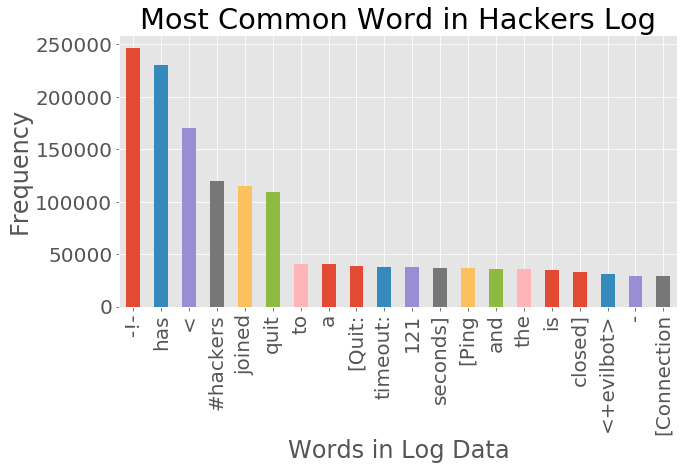

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title("Most Common Word in Hackers Log")
ax.set_xlabel("Words in Log Data")
ax.set_ylabel("Frequency")
s.value_counts()[:20].plot(kind='bar',ax=ax) # plotting 20 most comman words 
plt.show()

### Conclusion


*above figure we can see the most common word is -!- but we don't count it as it has no sense as has,V also doesno't have sense

#### Most Common Word is <b>#hackers</b>

#### second most common word is <b>joined</b>

#### third most common word is <b> quit </b>

*we will not include quit, to, a \[Quit as words then 

#### timeout is fourth most common word

###### others are seconds, ping, closed, <+evilbot> and [Connection]


### Processing Data without stop words

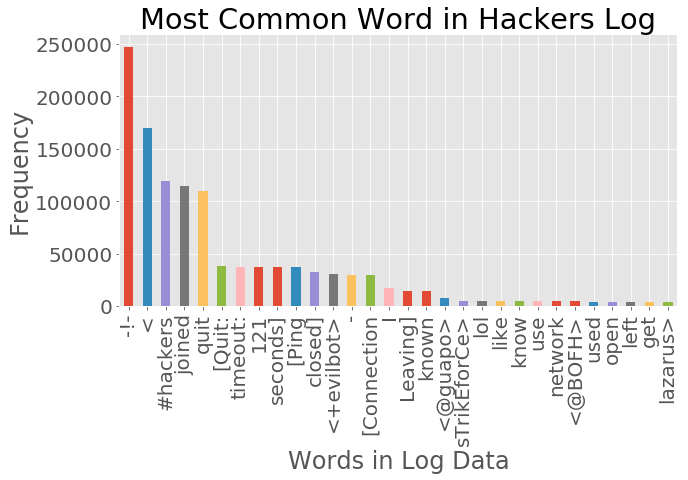

In [13]:
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = stopwords.words('english')
f = open('hackers.log',encoding='latin')
data = f.read().split()
new_data = pd.Series([ word for word in data if word not in stop_words])
word_freq = new_data.value_counts()
# 30 most Common Words 
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title("Most Common Word in Hackers Log")
ax.set_xlabel("Words in Log Data")
ax.set_ylabel("Frequency")
word_freq[:30].plot(kind='bar',ax=ax)
plt.show()

### Q3.  Count the total number of written messages (only those with actual text content) (2 pts).Summarize the users that posted the most messages (2pts)

In [101]:
f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()
print(data[:10000])

--- Log opened Tue Sep 20 00:01:49 2016
00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit: Bye]
00:11 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:14 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has joined #hackers
00:15 -!- _CyBruh_ [-Cybruh@AN-gm6.oj9.rj1tv4.IP] has quit [Quit: Leaving]
00:20 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?
00:27 < ice231> we need help with an op but were stuck at this one part
00:27 -!- Bobseviltwin [steven@stupid.hunkey.monkey] has quit [Ping timeout: 121 seconds]
00:30 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has quit [Quit: Leaving]
00:30 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:35 -!- Anonymous5 [Anonymous5@AN-tu4.e85.r2ddjo.IP] has joined #hackers


In [102]:
pattern = r"[0-9]{0,2}:[0-9]{0,2}.*<.*>.*"
lines = []
for line in data.split('\n') : 
    d = re.findall(pattern,line)
    if d : 
        lines.append(d[0])

In [103]:
lines[:5000]

['00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?',
 '00:27 < ice231> we need help with an op but were stuck at this one part',
 '01:17 < HeavenGuard> hello?',
 '01:17 <+nemecy> hi',
 '01:23 < ice231> hi',
 "02:55 < Ctrl> Do any of you know any trusted services that provide offshore dedicated servers in countries like Iran, Russia, China, etc, that won't bend at pressure from LE",
 '02:56 < Ctrl> And take bitcoin obviously ',
 '03:50 < cryptomillz> #tutorials',
 '03:51 < Winston> /join #tutorials',
 '03:51 < Winston> do that cryptomillz ^^^',
 '04:15 < cryptomillz> i cant find tutorials on the list',
 '04:16 < cryptomillz> found it',
 '06:32 < UnknownError> Wat ap my bois',
 '07:23 < Freak> Anyone got a good dork for SQLi?',
 '07:40 < sTrikEforCe> i am a giant drunk dork!',
 '09:09 <+nemecy> hi',
 '09:10 < inity13> o/',
 '10:19 <+nemecy> http://i.imgur.com/PoCjYqQ.png',
 '10:53 < maxmuster> ?',
 '10:53 < maxmuster> why',
 '10:55 < CrazyAtom> cause',
 '11:02 < max

In [104]:
messages = '\n'.join(lines)

In [105]:
len(data.split('\n'))

478905

In [106]:
messages[:1000]

"00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?\n00:27 < ice231> we need help with an op but were stuck at this one part\n01:17 < HeavenGuard> hello?\n01:17 <+nemecy> hi\n01:23 < ice231> hi\n02:55 < Ctrl> Do any of you know any trusted services that provide offshore dedicated servers in countries like Iran, Russia, China, etc, that won't bend at pressure from LE\n02:56 < Ctrl> And take bitcoin obviously \n03:50 < cryptomillz> #tutorials\n03:51 < Winston> /join #tutorials\n03:51 < Winston> do that cryptomillz ^^^\n04:15 < cryptomillz> i cant find tutorials on the list\n04:16 < cryptomillz> found it\n06:32 < UnknownError> Wat ap my bois\n07:23 < Freak> Anyone got a good dork for SQLi?\n07:40 < sTrikEforCe> i am a giant drunk dork!\n09:09 <+nemecy> hi\n09:10 < inity13> o/\n10:19 <+nemecy> http://i.imgur.com/PoCjYqQ.png\n10:53 < maxmuster> ?\n10:53 < maxmuster> why\n10:55 < CrazyAtom> cause\n11:02 < maxmuster> https://vid.pr0gramm.com/2015/08/28/8a9af1793785d29e.mp4

In [107]:
length = len(messages.split('\n'))
print(length)

229670


## So There are total 229670 messages with actual text Content out of 478905 lines of text available in log file 

In [122]:
pat = re.compile('<.*>')


In [123]:
k = re.findall(pat,messages)

In [124]:
len(k)

229670

In [114]:
s = pd.Series(data=k)
s = s.apply(lambda x:x[1:-1].strip())

In [115]:
s.head()

0         ice231
1         ice231
2    HeavenGuard
3        +nemecy
4         ice231
dtype: object

In [116]:
s.tail()

229665         hypnotic
229666         hypnotic
229667    +Cogitabundus
229668    +Cogitabundus
229669             DeTH
dtype: object

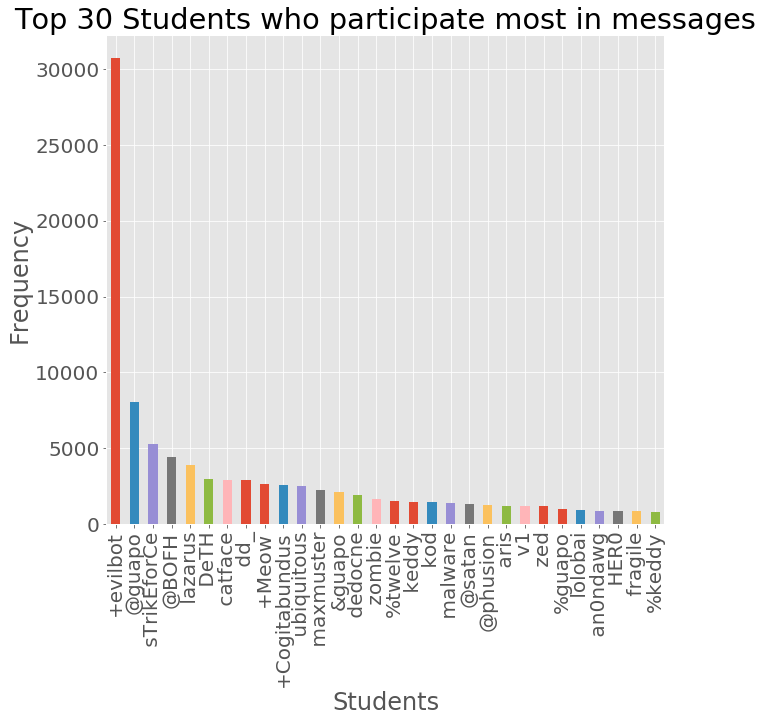

In [27]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
plt.title("Top 30 Students who participate most in messages")
plt.xlabel("Students")
plt.ylabel("Frequency")
s = s.apply(lambda x:x[1:-1])
s.value_counts()[:30].plot(kind='bar',ax=ax)
plt.show()

## So most of the messages are send by +evilbot than @guapo, sTriKEforCe, @BOFH and other common user who send most messages are lazarus, DeTH, catface, dd and so on ...


## Q.4  Find and rank (by count) words not in an English dictionary (3 pts). This is a simple method that can identify some names of malware tools

In [1]:
import pandas as pd 
import numpy as np 
df  = pd.read_csv('english_words.csv',sep='\t',header=None)
df.head()
df.drop(1,axis=1,inplace=True)
print(df.shape)
df.head()

(333333, 1)


,0
0,the
1,of
2,and
3,to
4,a


In [2]:
word_list = df.to_dict()[0]

In [3]:
english_word = list(word_list.values())

In [4]:
import nltk 
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  

def check_english_word(word):
    word = word.lower()
    if not wordnet.synsets(word):
        #Not an English Word
        p = re.compile(r".*[0-9]{0,2}:[0-9]{0,2}.*")
        p1 = re.compile(r".*-!-.*")
        p2 = re.compile(r".*<|>.*")
        p3 = re.compile(r".*\s.*")
        p4 = re.compile(r"[0-9]*")
        p5 = re.compile(r".*\[|\].*")
        p6 = re.compile(r".*@.*")
        pat = re.findall(p,word)
        pat1 = re.findall(p1,word)
        pat2 = re.findall(p2,word)
        pat3 = re.findall(p3,word)
        pat4 = re.findall(p4,word)
        pat5 = re.findall(p5,word)
        pat6 = re.findall(p6,word)
        
        if any([pat,pat1,pat2,pat5,pat3]): 
            return np.nan
        elif word in stop_words : 
            return np.nan
        elif word.isidentifier() : 
            return word
        else  : 
            return np.nan
    else:
        #English Word
        return np.nan

In [23]:
str.isidentifier

<method 'isidentifier' of 'str' objects>

In [24]:
f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()


In [128]:
data = messages.split('\n')

In [129]:
data = ' '.join(data)

In [130]:
data = data.split()

In [131]:
series = pd.Series(data)

In [132]:
no_english_words = series.apply(check_english_word)

In [133]:
no_english_words.dropna(inplace=True)

In [134]:
no_english_words.value_counts()[:1130]

-              28435
lol             5758
?               3810
im              3207
sql             2791
could           2682
would           2671
perl            2540
dont            2469
i'm             2415
anyone          1895
something       1635
/               1624
nmap            1581
hey             1537
login           1503
-tools          1433
thats           1425
sqlmap          1405
that's          1400
pentesting      1394
wireshark       1362
nikto           1332
aircrack-ng     1317
wordpress       1313
wep             1301
vpn             1299
dsniff          1297
wpscan          1283
,               1276
               ...  
lulzsec           25
he'll             25
around?           25
things,           25
wich              25
attack.           25
whoa              25
said.             25
l33t              25
-nikto            25
bsd               25
fine.             25
name,             25
tool.             25
gdb               25
et                25
k@li         

In [141]:
no_english_words.iloc[12]

'#tutorials'

In [142]:
no_english_words.shape

(340134,)

In [143]:
n = no_english_words.apply(lambda x : x if x.strip() not in words else np.nan)

In [144]:
p = n.dropna()

In [145]:
n.shape

(340134,)

In [146]:
p.shape

(309052,)

In [147]:
pat = '[0-9]*'
s = '    123  '
k = re.match(pat,s)
sum(k.span())

0

In [148]:
non_english = p.apply(lambda word: np.nan if sum((re.match(pat,word.strip())).span()) else word)

In [149]:
import nltk
words = set(nltk.corpus.words.words())


In [150]:
'could' in words

True

In [151]:
non_english.dropna(inplace=True)


In [152]:
p.shape

(309052,)

In [153]:
non_english.shape

(301799,)

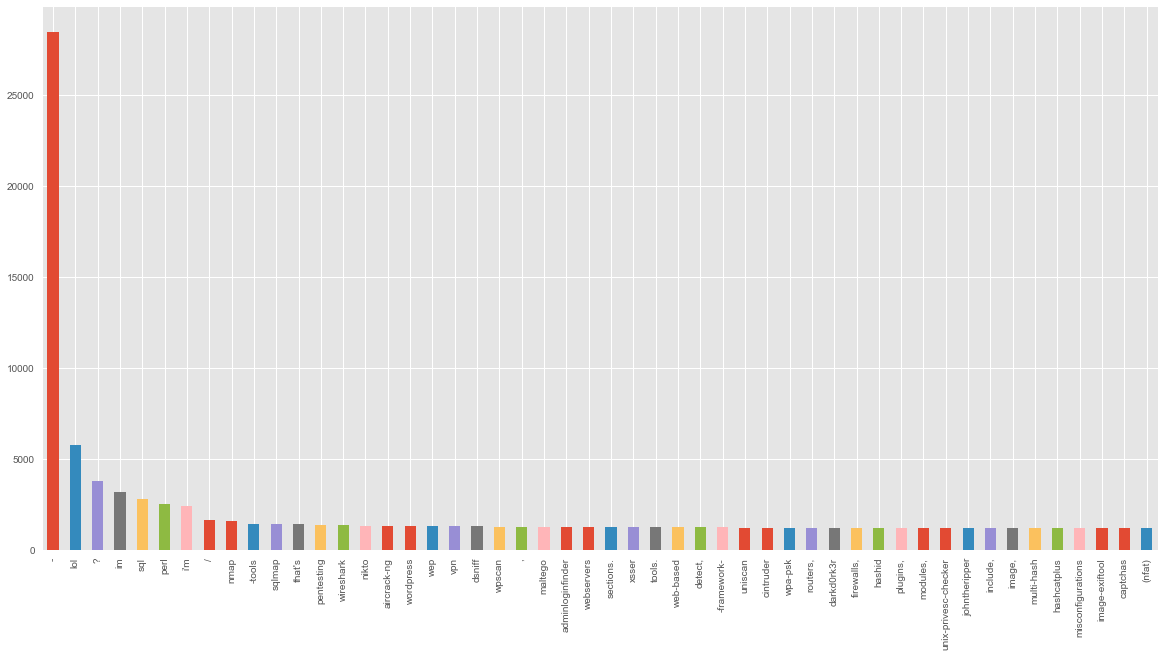

In [172]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
non_english.value_counts()[:50].plot(kind='bar',ax=ax)
plt.show()

In [158]:
 data  = non_english.value_counts()[:10000]

In [160]:
data = list(data.index)

In [161]:
data = "\n".join(data)

In [162]:
print(data)

-
lol
?
im
sql
perl
i'm
/
nmap
-tools
sqlmap
that's
pentesting
wireshark
nikto
aircrack-ng
wordpress
wep
vpn
dsniff
wpscan
,
maltego
adminloginfinder
webservers
sections.
xsser
tools.
web-based
detect,
-framework-
uniscan
cintruder
wpa-psk
routers,
darkd0rk3r
firewalls,
hashid
plugins,
modules,
unix-privesc-checker
johntheripper
include,
image,
multi-hash
hashcatplus
misconfigurations
image-exiftool
captchas
(nfat)
unprivilged
only!
wisely.
gpgpu-based
cmsexplorer
xd
encrypted)
can't
v3n0m
darkd0rker
updated,
recoded,
networkmine
it.
&
haha
ive
i've
^
irc
ï¸ï¸
it?
gonna
wanna
i'll
idk
|
guapo
#opnewblood
what's
...
networkminer
anonops
;)
admin
usb
ddos
what?
vm
lmao
facebook
yeah,
etc
vpns
well,
bro
hmm
wtf
github
there's
it,
you?
malware
=
bofh
encrypted(ssl),
ssh
o/
isnt
metasploit
ubuntu
me?
domain,
that?
that.
!
i'd
+
right?
no,
he's
youre
here?
they're
dns
gotta
yes,
.
botnet
^^
..
me.
you.
youtube
nah
cuz
yup
hahaha
encrypted(ssl))
brb
#learninghub
others
??
alot
op
thx
*
so,


In [182]:
filter_english = no_english_words.apply(lambda word : word if word.strip().isidentifier() else np.nan)

In [183]:
no_english_words.shape

(340134,)

In [186]:
filter_english = filter_english.dropna()
filter_english.shape

(152287,)

In [190]:
filter_english.value_counts()[:20]

lol           5758
im            3207
sql           2791
could         2682
would         2671
perl          2540
dont          2469
anyone        1895
something     1635
nmap          1581
hey           1537
login         1503
thats         1425
sqlmap        1405
pentesting    1394
wireshark     1362
nikto         1332
wordpress     1313
wep           1301
vpn           1299
dtype: int64

In [193]:
import nltk
words = set(nltk.corpus.words.words())

'could' in words

True

In [195]:
final_words = filter_english.apply(lambda x:np.nan if x.strip().lower() in words else x.strip().lower() )
final_words = final_words.dropna()

In [197]:
filter_english.shape

(152287,)

In [198]:
final_words.shape

(121205,)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


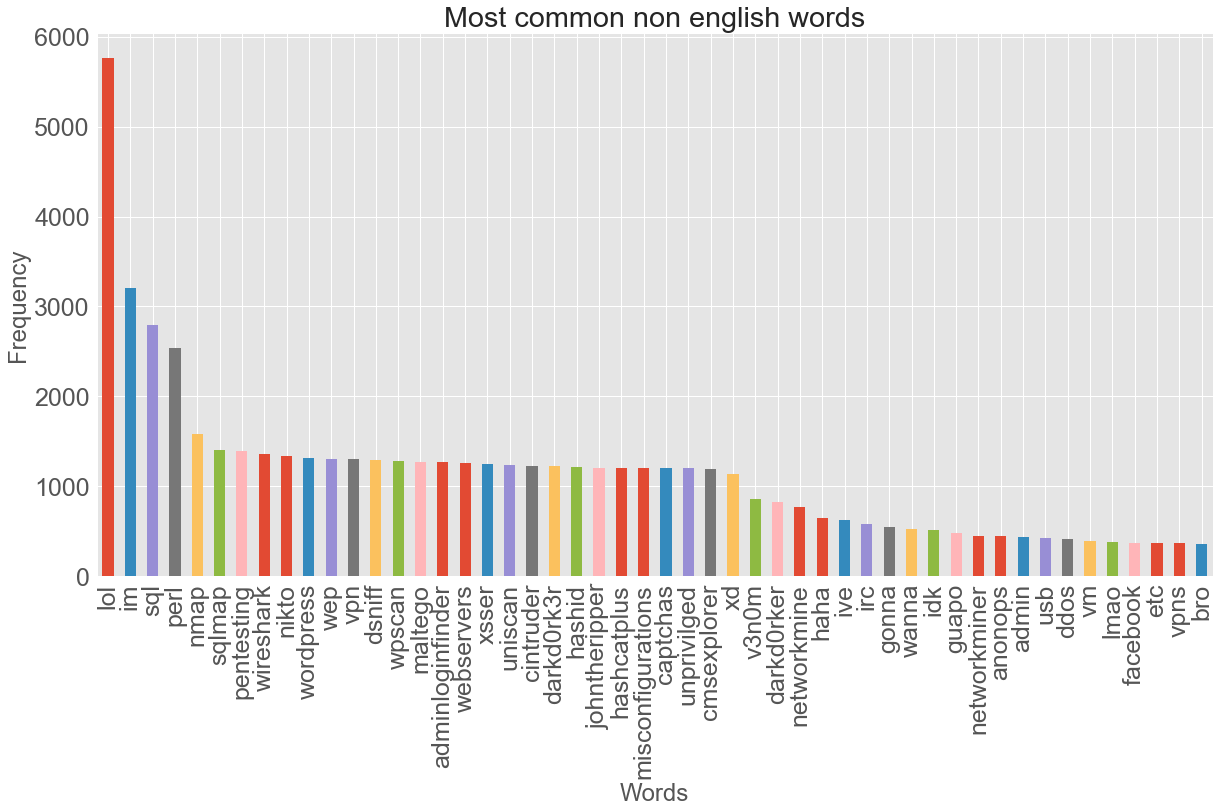

In [257]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(20,10))
plt.title("Most common non english words")
plt.ylabel('Frequency')
plt.xlabel("Words")
ax = fig.add_subplot(1,1,1)
final_words.value_counts()[:50].plot(ax=ax,kind='bar',fontsize=25)
plt.show()

final_words.to_csv("Most_Common_Non_English_Words.csv")

## So by counting non english words we have found some name of malware tools such as  nmap, sqlmap, pentesting, wireshark, nikto, dnsiff,wpscan,maltego,adminloginfinder, xser, uniscan, cintruder,

# Q.5 5. Which hours of the day had the most messages (2pts)? Which days had the most traffic (or messages) (2pts)?

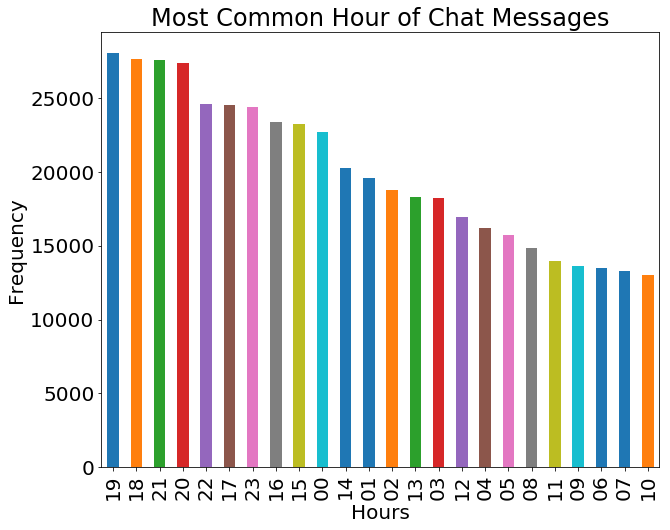

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 20
f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()
time = pd.Series(re.findall(r'[0-9]{1,2}:',data))
time = time.apply(lambda x: x[:-1])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
time.value_counts()[:24].plot(kind='bar',ax=ax)
plt.title("Most Common Hour of Chat Messages")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

## most common hours are 19,18,21 and 20

# Q.6 Find and list the URLs posted in the chat. (2pts)

In [208]:
messages[:1000]

"00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?\n00:27 < ice231> we need help with an op but were stuck at this one part\n01:17 < HeavenGuard> hello?\n01:17 <+nemecy> hi\n01:23 < ice231> hi\n02:55 < Ctrl> Do any of you know any trusted services that provide offshore dedicated servers in countries like Iran, Russia, China, etc, that won't bend at pressure from LE\n02:56 < Ctrl> And take bitcoin obviously \n03:50 < cryptomillz> #tutorials\n03:51 < Winston> /join #tutorials\n03:51 < Winston> do that cryptomillz ^^^\n04:15 < cryptomillz> i cant find tutorials on the list\n04:16 < cryptomillz> found it\n06:32 < UnknownError> Wat ap my bois\n07:23 < Freak> Anyone got a good dork for SQLi?\n07:40 < sTrikEforCe> i am a giant drunk dork!\n09:09 <+nemecy> hi\n09:10 < inity13> o/\n10:19 <+nemecy> http://i.imgur.com/PoCjYqQ.png\n10:53 < maxmuster> ?\n10:53 < maxmuster> why\n10:55 < CrazyAtom> cause\n11:02 < maxmuster> https://vid.pr0gramm.com/2015/08/28/8a9af1793785d29e.mp4

In [241]:
url_pattern = re.compile(r'(http://|https://|www.)*')
data = """message http://hello world.com
jo marji ho kar www.faceboo.net hello
https://newworld.com"""

p = re.compile(r'https?://.*\.*')
q = re.compile(r'www\..*')
pat = re.findall(p,data)
print(pat)
pat1 = re.findall(q,data)
print(pat1)

['http://hello world.com', 'https://newworld.com']
['www.faceboo.net hello']


In [250]:

http_urls = re.findall(p,messages)
www_urls = re.findall(q,messages)


In [251]:
http_urls = pd.Series([ url.split()[0] for url in http_urls])
www_urls = pd.Series([ url.split()[0] for url in www_urls])

In [253]:
urls = http_urls.append(www_urls)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


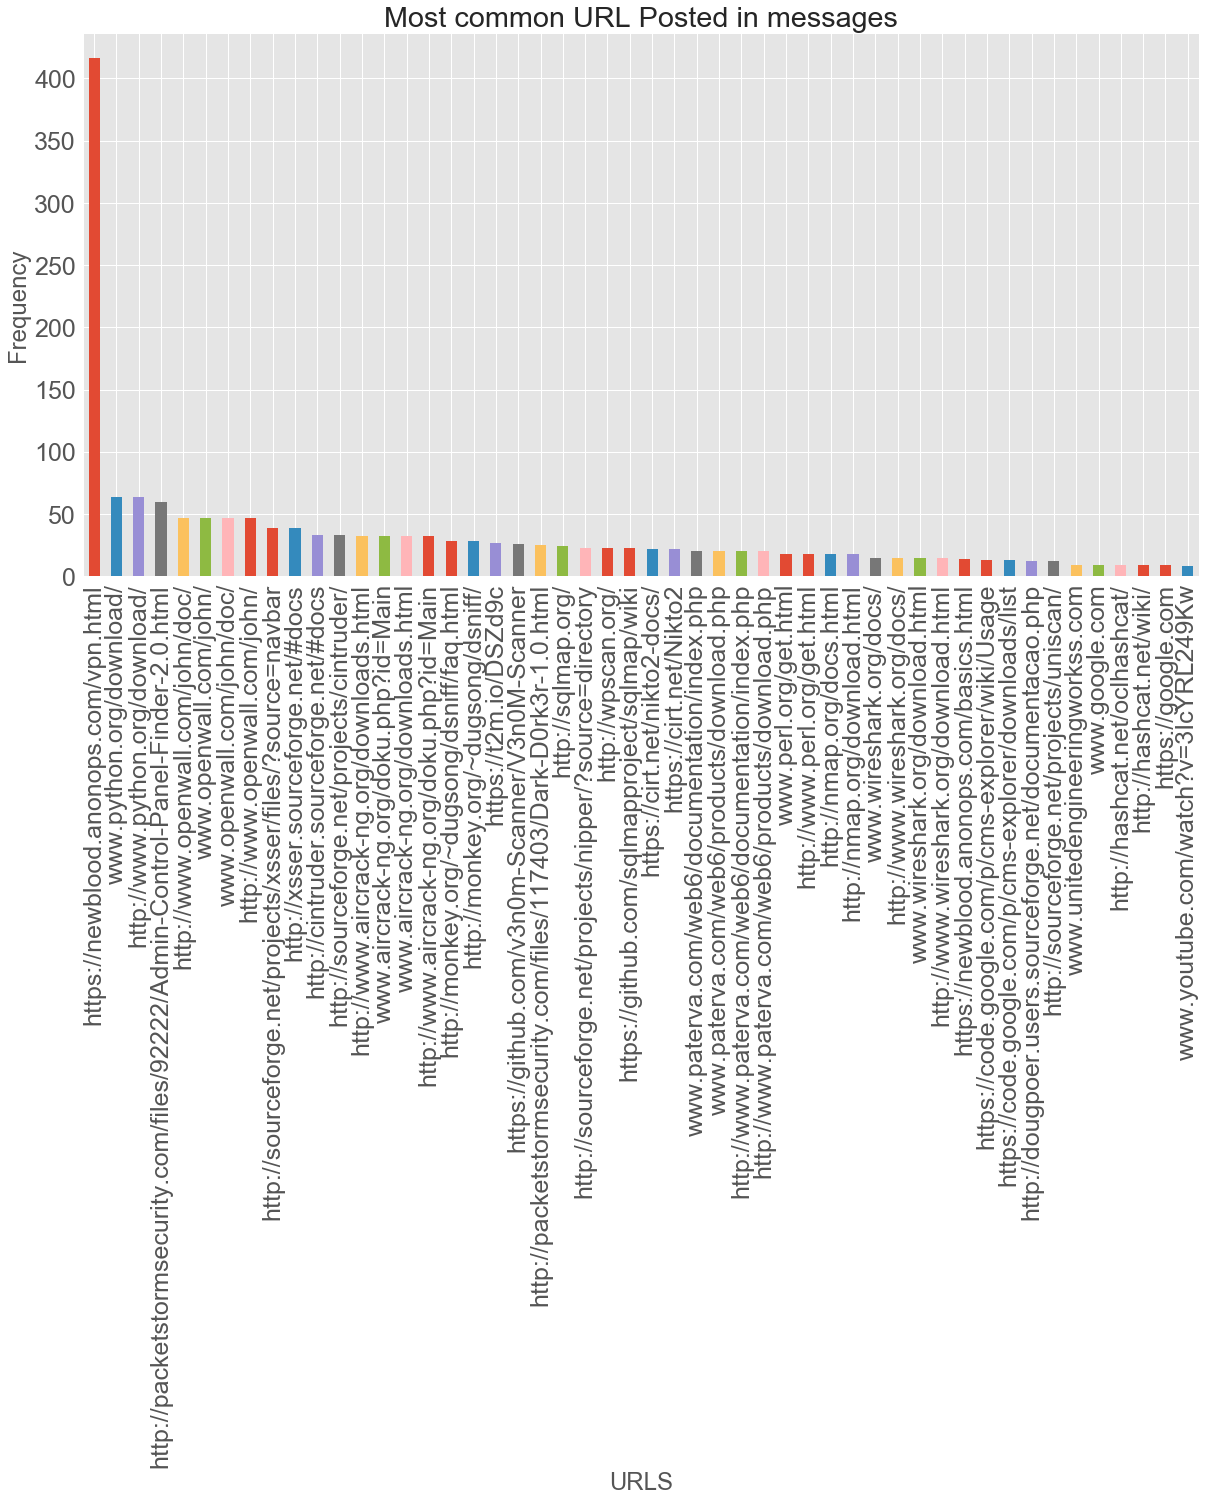

In [255]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(20,10))
plt.title("Most common URL Posted in messages")
plt.ylabel('Frequency')
plt.xlabel("URLS")
ax = fig.add_subplot(1,1,1)
urls.value_counts()[:50].plot(ax=ax,kind='bar',fontsize=25)
plt.show()

In [258]:
urls.to_csv("urls.csv")

In [260]:
urls[:100]

0                        http://i.imgur.com/PoCjYqQ.png
1     https://vid.pr0gramm.com/2015/08/28/8a9af17937...
2                          http://pastebin.com/iuE1sEZq
3                    http://monkey.org/~dugsong/dsniff/
4            http://monkey.org/~dugsong/dsniff/faq.html
5                 https://newblood.anonops.com/vpn.html
6                      https://ghostbin.com/paste/r6mte
7                https://github.com/Netsukuku/netsukuku
8                          https://www.sunnieday.nlhome
9           https://www.youtube.com/watch?v=IdKKCJk0w2E
10    https://www.youtube.com/channel/UCz6mEi8mD55SH...
11    https://www.facebook.com/jamal.oubram.7?ref=br_rs
12             https://paper.li/f-1471864321#!headlines
13          https://www.youtube.com/watch?v=tWdgAMYjYSs
14    https://en.wikipedia.org/wiki/Max_Headroom_bro...
15                         https://youtu.be/ThxmcVbV1ZI
16          https://www.youtube.com/watch?v=JLetjqe4MUU
17                         https://youtu.be/r6IR